### 데이터불러오기

In [ ]:
import pandas as pd
import numpy as np

train = pd.read_csv('electric_train.csv', index_col = 0)
test = pd.read_csv('electric_test.csv', index_col = 0)

## 데이터 전처리

### 불필요한 문자열 제거

In [ ]:
train.columns = train.columns.str.replace('electric_train.', '')
test.columns = test.columns.str.replace('electric_test.', '')
train.shape, test.shape

((7593355, 16), (2829478, 11))

In [ ]:
train.head()

,num,tm,hh24,n,stn,sum_qctr,sum_load,n_mean_load,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elec
1,4821,2021-01-01 01:00:00,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56
2,4821,2021-01-01 02:00:00,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78
3,4821,2021-01-01 03:00:00,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17
4,4821,2021-01-01 04:00:00,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34
5,4821,2021-01-01 05:00:00,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73


### 열 이름 통일

In [ ]:
train = train.rename(columns = {'tm':'TM','num':'NUM', 'hh24':'HH24', 'stn':'STN', 'tm':'TM'})
train.head()

,NUM,TM,HH24,n,STN,sum_qctr,sum_load,n_mean_load,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elec
1,4821,2021-01-01 01:00:00,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56
2,4821,2021-01-01 02:00:00,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78
3,4821,2021-01-01 03:00:00,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17
4,4821,2021-01-01 04:00:00,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34
5,4821,2021-01-01 05:00:00,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73


In [ ]:
test.head()

,TM,HH24,STN,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elect
NUM,,,,,,,,,,,
4816,2023-01-01 01:00:00,1,752,3.0,68.6,2.9,0.0,-0.1,6,1.0,NaN
4816,2023-01-01 02:00:00,2,752,3.1,69.4,2.7,0.0,0.3,6,1.0,NaN
4816,2023-01-01 03:00:00,3,752,3.6,68.3,2.3,0.0,1.2,6,1.0,NaN
4816,2023-01-01 04:00:00,4,752,4.0,69.2,3.1,0.0,1.1,6,1.0,NaN
4816,2023-01-01 05:00:00,5,752,4.2,69.5,2.5,0.0,2.0,6,1.0,NaN


### test 데이터 인덱스 초기화
- Num -> index

In [ ]:
test = test.reset_index()

In [ ]:
test.head()

,NUM,TM,HH24,STN,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elect
0,4816,2023-01-01 01:00:00,1,752,3.0,68.6,2.9,0.0,-0.1,6,1.0,NaN
1,4816,2023-01-01 02:00:00,2,752,3.1,69.4,2.7,0.0,0.3,6,1.0,NaN
2,4816,2023-01-01 03:00:00,3,752,3.6,68.3,2.3,0.0,1.2,6,1.0,NaN
3,4816,2023-01-01 04:00:00,4,752,4.0,69.2,3.1,0.0,1.1,6,1.0,NaN
4,4816,2023-01-01 05:00:00,5,752,4.2,69.5,2.5,0.0,2.0,6,1.0,NaN


In [ ]:
train.columns

Index(['NUM', 'TM', 'HH24', 'n', 'STN', 'sum_qctr', 'sum_load', 'n_mean_load',
       'nph_ta', 'nph_hm', 'nph_ws_10m', 'nph_rn_60m', 'nph_ta_chi', 'weekday',
       'week_name', 'elec'],
      dtype='object')

In [ ]:
test.columns

Index(['NUM', 'TM', 'HH24', 'STN', 'nph_ta', 'nph_hm', 'nph_ws_10m',
       'nph_rn_60m', 'nph_ta_chi', 'weekday', 'week_name', 'elect'],
      dtype='object')

In [ ]:
train.shape

(7593355, 16)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7593355 entries, 1 to 7593355
Data columns (total 16 columns):
 #   Column       Dtype  
---  ------       -----  
 0   NUM          int64  
 1   TM           object 
 2   HH24         int64  
 3   n            int64  
 4   STN          int64  
 5   sum_qctr     int64  
 6   sum_load     float64
 7   n_mean_load  float64
 8   nph_ta       float64
 9   nph_hm       float64
 10  nph_ws_10m   float64
 11  nph_rn_60m   float64
 12  nph_ta_chi   float64
 13  weekday      int64  
 14  week_name    int64  
 15  elec         float64
dtypes: float64(8), int64(7), object(1)
memory usage: 984.9+ MB


### **TM** 변수 자료형 변환하기
- datetime으로 변환

In [ ]:
train['TM']=pd.to_datetime(train['TM'])
print(train['TM'])

1         2021-01-01 01:00:00
2         2021-01-01 02:00:00
3         2021-01-01 03:00:00
4         2021-01-01 04:00:00
5         2021-01-01 05:00:00
                  ...        
7593351   2022-12-31 20:00:00
7593352   2022-12-31 21:00:00
7593353   2022-12-31 22:00:00
7593354   2022-12-31 23:00:00
7593355   2023-01-01 00:00:00
Name: TM, Length: 7593355, dtype: datetime64[ns]


In [ ]:
test['TM']=pd.to_datetime(test['TM'])
print(test['TM'])

0         2023-01-01 01:00:00
1         2023-01-01 02:00:00
2         2023-01-01 03:00:00
3         2023-01-01 04:00:00
4         2023-01-01 05:00:00
                  ...        
2829473   2023-12-31 20:00:00
2829474   2023-12-31 21:00:00
2829475   2023-12-31 22:00:00
2829476   2023-12-31 23:00:00
2829477   2024-01-01 00:00:00
Name: TM, Length: 2829478, dtype: datetime64[ns]


In [ ]:
print(train.columns)
print(test.columns)

Index(['NUM', 'TM', 'HH24', 'n', 'STN', 'sum_qctr', 'sum_load', 'n_mean_load',
       'nph_ta', 'nph_hm', 'nph_ws_10m', 'nph_rn_60m', 'nph_ta_chi', 'weekday',
       'week_name', 'elec'],
      dtype='object')
Index(['NUM', 'TM', 'HH24', 'STN', 'nph_ta', 'nph_hm', 'nph_ws_10m',
       'nph_rn_60m', 'nph_ta_chi', 'weekday', 'week_name', 'elect'],
      dtype='object')


In [ ]:
train=train[['NUM', 'TM', 'HH24', 'STN', 'nph_ta', 'nph_hm', 'nph_ws_10m',
       'nph_rn_60m', 'nph_ta_chi', 'weekday', 'week_name','elec']]
train.head()

,NUM,TM,HH24,STN,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elec
1,4821,2021-01-01 01:00:00,1,884,2.2,62.7,1.8,0.0,-1.0,4,0,99.56
2,4821,2021-01-01 02:00:00,2,884,2.3,63.1,2.1,0.0,-0.6,4,0,91.78
3,4821,2021-01-01 03:00:00,3,884,2.2,62.4,2.5,0.0,-1.3,4,0,79.17
4,4821,2021-01-01 04:00:00,4,884,1.7,63.5,1.7,0.0,-0.2,4,0,73.34
5,4821,2021-01-01 05:00:00,5,884,1.7,63.0,1.6,0.0,-0.8,4,0,69.73


In [ ]:
test.head()

,NUM,TM,HH24,STN,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elect
0,4816,2023-01-01 01:00:00,1,752,3.0,68.6,2.9,0.0,-0.1,6,1.0,NaN
1,4816,2023-01-01 02:00:00,2,752,3.1,69.4,2.7,0.0,0.3,6,1.0,NaN
2,4816,2023-01-01 03:00:00,3,752,3.6,68.3,2.3,0.0,1.2,6,1.0,NaN
3,4816,2023-01-01 04:00:00,4,752,4.0,69.2,3.1,0.0,1.1,6,1.0,NaN
4,4816,2023-01-01 05:00:00,5,752,4.2,69.5,2.5,0.0,2.0,6,1.0,NaN


## EDA

### 상관 관계 파악

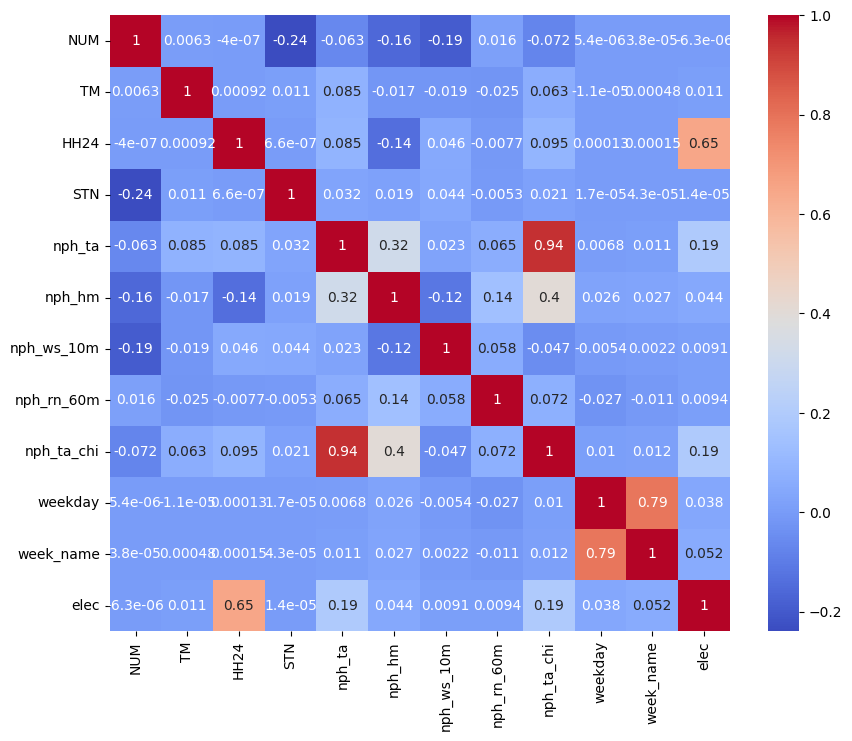

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

train_corr = train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(train_corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# VIF 계산을 위한 데이터 준비
X = add_constant(train[['elec', 'HH24']])

# VIF 계산
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("VIF 값 : \n", vif)

VIF 값 : 
   Variable        VIF
0    const  17.895158
1     elec   1.728616
2     HH24   1.728616


### 이상치 확인

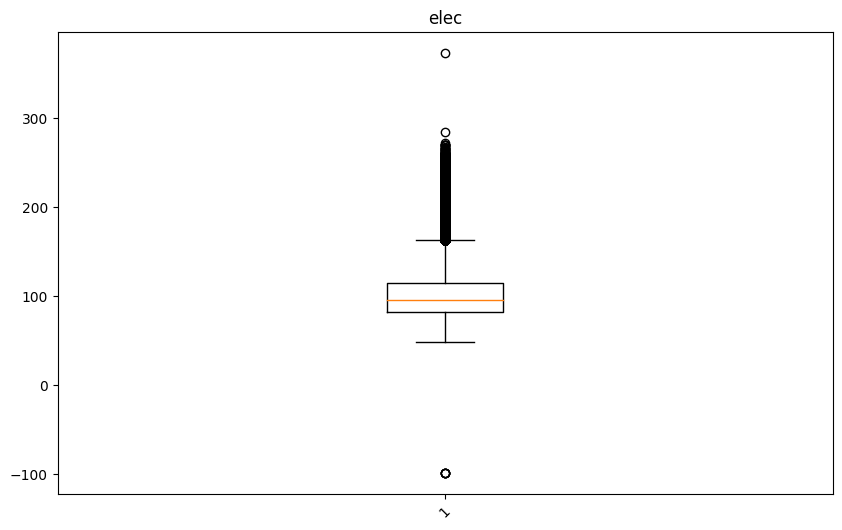

In [ ]:
# elec 변수의 이상치 박스 플롯
plt.figure(figsize=(10, 6))
plt.boxplot('elec', data=train)
plt.title('elec')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 아웃라이어 찾기
Q1 = train['elec'].quantile(0.25)
Q3 = train['elec'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = train[(train['elec'] < lower_bound) | (train['elec'] > upper_bound)]
print("아웃라이어 값들 : \n", outliers)
#print(outliers['TM'].unique())
print('아웃라이어 개수 : ', len(outliers))
print('아웃라이어 비율 : ', len(outliers)/len(train))

아웃라이어 값들 : 
            NUM                  TM  HH24  STN  nph_ta  nph_hm  nph_ws_10m  \
4436      4821 2021-07-04 20:00:00    20  884    22.4    99.4         1.2   
4437      4821 2021-07-04 21:00:00    21  884    22.4    99.5         0.9   
4459      4821 2021-07-05 19:00:00    19  884    24.9    99.7         2.5   
4460      4821 2021-07-05 20:00:00    20  884    24.9    99.7         2.6   
4461      4821 2021-07-05 21:00:00    21  884    24.9    99.7         2.8   
...        ...                 ...   ...  ...     ...     ...         ...   
7590040  20947 2022-08-15 21:00:00    21  671    27.7    78.6         1.0   
7590041  20947 2022-08-15 22:00:00    22  671    29.2    70.0         1.4   
7590042  20947 2022-08-15 23:00:00    23  671    28.9    68.5         1.2   
7590063  20947 2022-08-16 20:00:00    20  671    23.2    93.5         0.3   
7590064  20947 2022-08-16 21:00:00    21  671    22.8    94.0         0.6   

         nph_rn_60m  nph_ta_chi  weekday  week_name    elec  


In [ ]:
print('아웃라이어 개수 : ', len(outliers))
print(outliers['TM'].unique())

아웃라이어 개수 :  182664
<DatetimeArray>
['2021-07-04 20:00:00', '2021-07-04 21:00:00', '2021-07-05 19:00:00',
 '2021-07-05 20:00:00', '2021-07-05 21:00:00', '2021-07-05 22:00:00',
 '2021-07-05 23:00:00', '2021-07-06 19:00:00', '2021-07-06 20:00:00',
 '2021-07-06 21:00:00',
 ...
 '2021-03-01 21:00:00', '2021-03-01 22:00:00', '2020-10-27 23:00:00',
 '2021-07-14 11:00:00', '2021-07-15 09:00:00', '2021-07-26 10:00:00',
 '2021-07-27 09:00:00', '2021-07-28 09:00:00', '2021-08-20 14:00:00',
 '2020-05-11 20:00:00']
Length: 1759, dtype: datetime64[ns]


In [ ]:
x=train.iloc[:,:-1]
y=train.iloc[:,-1]
print(x.shape)
print(y.shape)

(7593355, 11)
(7593355,)


## 피처 엔지니어링

### 파생변수 생성

In [ ]:
# month 변수 생성
x['month'] = x['TM'].dt.month
test['month'] = test['TM'].dt.month
x.head()

,NUM,TM,HH24,STN,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,month
1,4821,2021-01-01 01:00:00,1,884,2.2,62.7,1.8,0.0,-1.0,4,0,1
2,4821,2021-01-01 02:00:00,2,884,2.3,63.1,2.1,0.0,-0.6,4,0,1
3,4821,2021-01-01 03:00:00,3,884,2.2,62.4,2.5,0.0,-1.3,4,0,1
4,4821,2021-01-01 04:00:00,4,884,1.7,63.5,1.7,0.0,-0.2,4,0,1
5,4821,2021-01-01 05:00:00,5,884,1.7,63.0,1.6,0.0,-0.8,4,0,1


In [ ]:
# 계절변수 생성
def assign_season(month):
    if month in [3,4,5]:
        return 0 # 봄
    elif month in [6,7,8]:
        return 1 # 여름
    elif month in [9,10,11]:
        return 2 # 가을
    else:
        return 3 # 겨울

In [ ]:
x['season'] = x['month'].apply(assign_season)
test['season'] = test['month'].apply(assign_season)
x['season'].value_counts()

season
0    1912127
1    1912127
2    1891341
3    1877760
Name: count, dtype: int64

In [ ]:
# 이전 시간의 기온과 현재 기온의 차이 변수 생성
x['temp_diff'] = x['nph_ta'].diff()
x['temp_diff'] = x['temp_diff'].fillna(0)

# 이전 시간의 습도와 현재 습도의 차이 변수 생성
x['humidity_diff'] = x['nph_hm'].diff()
x['humidity_diff'] = x['humidity_diff'].fillna(0)

# 풍속 차이 (이전 시간과 현재 시간의 차이)
x['wind_speed_diff'] = x['nph_ws_10m'].diff()
x['wind_speed_diff'] = x['wind_speed_diff'].fillna(0)

# 강수량 차이 (이전 시간과 현재 시간의 차이)
x['rain_accum_diff'] = x['nph_rn_60m'].diff()
x['rain_accum_diff'] = x['rain_accum_diff'].fillna(0)

# 체감온도 차이 (이전 시간과 현재 시간의 차이)
x['apparent_temp_diff'] = x['nph_ta_chi'].diff()
x['apparent_temp_diff'] = x['apparent_temp_diff'].fillna(0)

x.head()

,NUM,TM,HH24,STN,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,month,season,temp_diff,humidity_diff,wind_speed_diff,rain_accum_diff,apparent_temp_diff
1,4821,2021-01-01 01:00:00,1,884,2.2,62.7,1.8,0.0,-1.0,4,0,1,3,0.0,0.0,0.0,0.0,0.0
2,4821,2021-01-01 02:00:00,2,884,2.3,63.1,2.1,0.0,-0.6,4,0,1,3,0.1,0.4,0.3,0.0,0.4
3,4821,2021-01-01 03:00:00,3,884,2.2,62.4,2.5,0.0,-1.3,4,0,1,3,-0.1,-0.7,0.4,0.0,-0.7
4,4821,2021-01-01 04:00:00,4,884,1.7,63.5,1.7,0.0,-0.2,4,0,1,3,-0.5,1.1,-0.8,0.0,1.1
5,4821,2021-01-01 05:00:00,5,884,1.7,63.0,1.6,0.0,-0.8,4,0,1,3,0.0,-0.5,-0.1,0.0,-0.6


In [ ]:
# 이전 시간의 기온과 현재 기온의 차이 변수 생성
test['temp_diff'] = test['nph_ta'].diff()
test['temp_diff'] = test['temp_diff'].fillna(0)

# 이전 시간의 습도와 현재 습도의 차이 변수 생성
test['humidity_diff'] = test['nph_hm'].diff()
test['humidity_diff'] = test['humidity_diff'].fillna(0)

# 풍속 차이 (이전 시간과 현재 시간의 차이)
test['wind_speed_diff'] = test['nph_ws_10m'].diff()
test['wind_speed_diff'] = test['wind_speed_diff'].fillna(0)

# 강수량 차이 (이전 시간과 현재 시간의 차이)
test['rain_accum_diff'] = test['nph_rn_60m'].diff()
test['rain_accum_diff'] = test['rain_accum_diff'].fillna(0)

# 체감온도 차이 (이전 시간과 현재 시간의 차이)
test['apparent_temp_diff'] = test['nph_ta_chi'].diff()
test['apparent_temp_diff'] = test['apparent_temp_diff'].fillna(0)

test.head()

,NUM,TM,HH24,STN,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elect,month,season,temp_diff,humidity_diff,wind_speed_diff,rain_accum_diff,apparent_temp_diff
0,4816,2023-01-01 01:00:00,1,752,3.0,68.6,2.9,0.0,-0.1,6,1.0,NaN,1,3,0.0,0.0,0.0,0.0,0.0
1,4816,2023-01-01 02:00:00,2,752,3.1,69.4,2.7,0.0,0.3,6,1.0,NaN,1,3,0.1,0.8,-0.2,0.0,0.4
2,4816,2023-01-01 03:00:00,3,752,3.6,68.3,2.3,0.0,1.2,6,1.0,NaN,1,3,0.5,-1.1,-0.4,0.0,0.9
3,4816,2023-01-01 04:00:00,4,752,4.0,69.2,3.1,0.0,1.1,6,1.0,NaN,1,3,0.4,0.9,0.8,0.0,-0.1
4,4816,2023-01-01 05:00:00,5,752,4.2,69.5,2.5,0.0,2.0,6,1.0,NaN,1,3,0.2,0.3,-0.6,0.0,0.9


In [ ]:
print(x.shape)
print(test.shape)

(7593355, 18)
(2829478, 19)


In [ ]:
#최근 3시간 동안 기온 변화 경향 변수 생성
x['temp_trend'] = x['nph_ta'].rolling(window=3).mean()
x['temp_trend'] = x['temp_trend'].fillna(0)

#최근 3시간 동안 습도 변화 경향 변수 생성
x['humidity_trend'] = x['nph_hm'].rolling(window=3).mean()
x['humidity_trend'] = x['humidity_trend'].fillna(0)

#최근 3시간 동안 풍속 변화 경향 변수 생성
x['wind_speed_trend'] = x['nph_ws_10m'].rolling(window=3).mean()
x['wind_speed_trend'] = x['wind_speed_trend'].fillna(0)

#최근 3시간 동안 강수량 변화 경향 변수 생성
x['rain_accum_trend'] = x['nph_rn_60m'].rolling(window=3).mean()
x['rain_accum_trend'] = x['rain_accum_trend'].fillna(0)

#최근 3시간 동안 체감온도 변화 경향 변수 생성
x['apparent_temp_trend'] = x['nph_ta_chi'].rolling(window=3).mean()
x['apparent_temp_trend'] = x['apparent_temp_trend'].fillna(0)


x.head()


,NUM,TM,HH24,STN,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,...,temp_diff,humidity_diff,wind_speed_diff,rain_accum_diff,apparent_temp_diff,temp_trend,humidity_trend,wind_speed_trend,rain_accum_trend,apparent_temp_trend
1,4821,2021-01-01 01:00:00,1,884,2.2,62.7,1.8,0.0,-1.0,4,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2,4821,2021-01-01 02:00:00,2,884,2.3,63.1,2.1,0.0,-0.6,4,...,0.1,0.4,0.3,0.0,0.4,0.000000,0.000000,0.000000,0.0,0.000000
3,4821,2021-01-01 03:00:00,3,884,2.2,62.4,2.5,0.0,-1.3,4,...,-0.1,-0.7,0.4,0.0,-0.7,2.233333,62.733333,2.133333,0.0,-0.966667
4,4821,2021-01-01 04:00:00,4,884,1.7,63.5,1.7,0.0,-0.2,4,...,-0.5,1.1,-0.8,0.0,1.1,2.066667,63.000000,2.100000,0.0,-0.700000
5,4821,2021-01-01 05:00:00,5,884,1.7,63.0,1.6,0.0,-0.8,4,...,0.0,-0.5,-0.1,0.0,-0.6,1.866667,62.966667,1.933333,0.0,-0.766667


In [ ]:
#최근 3시간 동안 기온 변화 경향 변수 생성
test['temp_trend'] = test['nph_ta'].rolling(window=3).mean()
test['temp_trend'] = test['temp_trend'].fillna(0)

#최근 3시간 동안 습도 변화 경향 변수 생성
test['humidity_trend'] = test['nph_hm'].rolling(window=3).mean()
test['humidity_trend'] = test['humidity_trend'].fillna(0)

#최근 3시간 동안 풍속 변화 경향 변수 생성
test['wind_speed_trend'] = test['nph_ws_10m'].rolling(window=3).mean()
test['wind_speed_trend'] = test['wind_speed_trend'].fillna(0)

#최근 3시간 동안 강수량 변화 경향 변수 생성
test['rain_accum_trend'] = test['nph_rn_60m'].rolling(window=3).mean()
test['rain_accum_trend'] = test['rain_accum_trend'].fillna(0)

#최근 3시간 동안 체감온도 변화 경향 변수 생성
test['apparent_temp_trend'] = test['nph_ta_chi'].rolling(window=3).mean()
test['apparent_temp_trend'] = test['apparent_temp_trend'].fillna(0)

test.head()


,NUM,TM,HH24,STN,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,...,temp_diff,humidity_diff,wind_speed_diff,rain_accum_diff,apparent_temp_diff,temp_trend,humidity_trend,wind_speed_trend,rain_accum_trend,apparent_temp_trend
0,4816,2023-01-01 01:00:00,1,752,3.0,68.6,2.9,0.0,-0.1,6,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1,4816,2023-01-01 02:00:00,2,752,3.1,69.4,2.7,0.0,0.3,6,...,0.1,0.8,-0.2,0.0,0.4,0.000000,0.000000,0.000000,0.0,0.000000
2,4816,2023-01-01 03:00:00,3,752,3.6,68.3,2.3,0.0,1.2,6,...,0.5,-1.1,-0.4,0.0,0.9,3.233333,68.766667,2.633333,0.0,0.466667
3,4816,2023-01-01 04:00:00,4,752,4.0,69.2,3.1,0.0,1.1,6,...,0.4,0.9,0.8,0.0,-0.1,3.566667,68.966667,2.700000,0.0,0.866667
4,4816,2023-01-01 05:00:00,5,752,4.2,69.5,2.5,0.0,2.0,6,...,0.2,0.3,-0.6,0.0,0.9,3.933333,69.000000,2.633333,0.0,1.433333


In [ ]:
# 지점 변수 클러스터링

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

features = x[['nph_ta', 'nph_hm', 'nph_ws_10m']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# 급격히 완만해지는 부분의 클러스터 수 찾아야함. -> 3

In [ ]:
from sklearn.cluster import KMeans

features = x[['nph_ta', 'nph_hm', 'nph_ws_10m']]
kmeans = KMeans(n_clusters=3, random_state=42)
x['station_cluster'] = kmeans.fit_predict(features)
x['station_cluster'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


station_cluster
0    3287776
2    2778037
1    1527542
Name: count, dtype: int64

In [ ]:
features = test[['nph_ta', 'nph_hm', 'nph_ws_10m']]

test['station_cluster'] = kmeans.predict(features)
test['station_cluster'].value_counts()

station_cluster
0    1336589
2     977947
1     514942
Name: count, dtype: int64

In [ ]:
# 기온과 습도의 상호작용 항
x['temp_humidity_interaction'] = x['nph_ta'] * x['nph_hm']

# 풍속과 강수량의 상호작용 항
x['wind_rain_interaction'] = x['nph_ws_10m'] * x['nph_rn_60m']

# 기온과 풍속의 상호작용 항
x['temp_wind_interaction'] = x['nph_ta'] * x['nph_ws_10m']

x.head()

,NUM,TM,HH24,STN,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,...,apparent_temp_diff,temp_trend,humidity_trend,wind_speed_trend,rain_accum_trend,apparent_temp_trend,station_cluster,temp_humidity_interaction,wind_rain_interaction,temp_wind_interaction
1,4821,2021-01-01 01:00:00,1,884,2.2,62.7,1.8,0.0,-1.0,4,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,2,137.94,0.0,3.96
2,4821,2021-01-01 02:00:00,2,884,2.3,63.1,2.1,0.0,-0.6,4,...,0.4,0.000000,0.000000,0.000000,0.0,0.000000,2,145.13,0.0,4.83
3,4821,2021-01-01 03:00:00,3,884,2.2,62.4,2.5,0.0,-1.3,4,...,-0.7,2.233333,62.733333,2.133333,0.0,-0.966667,2,137.28,0.0,5.50
4,4821,2021-01-01 04:00:00,4,884,1.7,63.5,1.7,0.0,-0.2,4,...,1.1,2.066667,63.000000,2.100000,0.0,-0.700000,2,107.95,0.0,2.89
5,4821,2021-01-01 05:00:00,5,884,1.7,63.0,1.6,0.0,-0.8,4,...,-0.6,1.866667,62.966667,1.933333,0.0,-0.766667,2,107.10,0.0,2.72


In [ ]:
# 기온과 습도의 상호작용 항
test['temp_humidity_interaction'] = test['nph_ta'] * test['nph_hm']

# 풍속과 강수량의 상호작용 항
test['wind_rain_interaction'] = test['nph_ws_10m'] * test['nph_rn_60m']

# 기온과 풍속의 상호작용 항
test['temp_wind_interaction'] = test['nph_ta'] * test['nph_ws_10m']

test.head()

,NUM,TM,HH24,STN,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,...,apparent_temp_diff,temp_trend,humidity_trend,wind_speed_trend,rain_accum_trend,apparent_temp_trend,station_cluster,temp_humidity_interaction,wind_rain_interaction,temp_wind_interaction
0,4816,2023-01-01 01:00:00,1,752,3.0,68.6,2.9,0.0,-0.1,6,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,2,205.80,0.0,8.70
1,4816,2023-01-01 02:00:00,2,752,3.1,69.4,2.7,0.0,0.3,6,...,0.4,0.000000,0.000000,0.000000,0.0,0.000000,2,215.14,0.0,8.37
2,4816,2023-01-01 03:00:00,3,752,3.6,68.3,2.3,0.0,1.2,6,...,0.9,3.233333,68.766667,2.633333,0.0,0.466667,2,245.88,0.0,8.28
3,4816,2023-01-01 04:00:00,4,752,4.0,69.2,3.1,0.0,1.1,6,...,-0.1,3.566667,68.966667,2.700000,0.0,0.866667,2,276.80,0.0,12.40
4,4816,2023-01-01 05:00:00,5,752,4.2,69.5,2.5,0.0,2.0,6,...,0.9,3.933333,69.000000,2.633333,0.0,1.433333,2,291.90,0.0,10.50


In [ ]:
print(x.shape)
print(test.shape)

(7593355, 27)
(2829478, 28)


In [ ]:
test = test.drop('elect',axis=1)

In [ ]:
# datetime 타입을 처리하기 위한 자료형 변환 : datetime -> 숫자형
x['TM'] = x['TM'].apply(lambda x: x.toordinal())
test['TM'] = test['TM'].apply(lambda x: x.toordinal())

In [ ]:
print(x.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7593355 entries, 1 to 7593355
Data columns (total 27 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   NUM                        int64  
 1   TM                         int64  
 2   HH24                       int64  
 3   STN                        int64  
 4   nph_ta                     float64
 5   nph_hm                     float64
 6   nph_ws_10m                 float64
 7   nph_rn_60m                 float64
 8   nph_ta_chi                 float64
 9   weekday                    int64  
 10  week_name                  int64  
 11  month                      int32  
 12  season                     int64  
 13  temp_diff                  float64
 14  humidity_diff              float64
 15  wind_speed_diff            float64
 16  rain_accum_diff            float64
 17  apparent_temp_diff         float64
 18  temp_trend                 float64
 19  humidity_trend             float64
 20  wind_sp

In [ ]:
test['week_name'] = test['week_name'].astype('int')

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829478 entries, 0 to 2829477
Data columns (total 27 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   NUM                        int64  
 1   TM                         int64  
 2   HH24                       int64  
 3   STN                        int64  
 4   nph_ta                     float64
 5   nph_hm                     float64
 6   nph_ws_10m                 float64
 7   nph_rn_60m                 float64
 8   nph_ta_chi                 float64
 9   weekday                    int64  
 10  week_name                  int64  
 11  month                      int32  
 12  season                     int64  
 13  temp_diff                  float64
 14  humidity_diff              float64
 15  wind_speed_diff            float64
 16  rain_accum_diff            float64
 17  apparent_temp_diff         float64
 18  temp_trend                 float64
 19  humidity_trend             float64
 20  wi

In [ ]:
x.head()

,NUM,TM,HH24,STN,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,...,apparent_temp_diff,temp_trend,humidity_trend,wind_speed_trend,rain_accum_trend,apparent_temp_trend,station_cluster,temp_humidity_interaction,wind_rain_interaction,temp_wind_interaction
1,4821,737791,1,884,2.2,62.7,1.8,0.0,-1.0,4,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,2,137.94,0.0,3.96
2,4821,737791,2,884,2.3,63.1,2.1,0.0,-0.6,4,...,0.4,0.000000,0.000000,0.000000,0.0,0.000000,2,145.13,0.0,4.83
3,4821,737791,3,884,2.2,62.4,2.5,0.0,-1.3,4,...,-0.7,2.233333,62.733333,2.133333,0.0,-0.966667,2,137.28,0.0,5.50
4,4821,737791,4,884,1.7,63.5,1.7,0.0,-0.2,4,...,1.1,2.066667,63.000000,2.100000,0.0,-0.700000,2,107.95,0.0,2.89
5,4821,737791,5,884,1.7,63.0,1.6,0.0,-0.8,4,...,-0.6,1.866667,62.966667,1.933333,0.0,-0.766667,2,107.10,0.0,2.72


In [ ]:
print(x.shape)
print(test.shape)

(7593355, 27)
(2829478, 27)


### 최대최소 정규화


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
test_scaled = scaler.transform(test)

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import r2_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

## xgboost model

### 모델 생성/학습

In [ ]:
model = xgb.XGBRegressor(n_estimators=100, max_depth=10)
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### 검증용 데이터 예측/평가

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f'R^2 값: {r2}')

R^2 값: 0.9842017057184174


In [ ]:
from sklearn.metrics import mean_squared_error
print('mse : ',mean_squared_error(y_test, y_pred))
from sklearn.metrics import mean_absolute_error
print('mae : ',mean_absolute_error(y_test, y_pred))

mse :  9.988876680595572
mae :  2.239971226990421


### 최종 제출용 데이터 산출

In [ ]:
result = model.predict(test_scaled)
test_result = pd.read_csv('electric_test.csv')
test_result['elect'] = result
test_result.head()

,NUM,TM,HH24,STN,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elect
0,4816,2023-01-01 01:00:00,1,752,3.0,68.6,2.9,0.0,-0.1,6,1.0,96.928406
1,4816,2023-01-01 02:00:00,2,752,3.1,69.4,2.7,0.0,0.3,6,1.0,84.737595
2,4816,2023-01-01 03:00:00,3,752,3.6,68.3,2.3,0.0,1.2,6,1.0,78.339081
3,4816,2023-01-01 04:00:00,4,752,4.0,69.2,3.1,0.0,1.1,6,1.0,72.678352
4,4816,2023-01-01 05:00:00,5,752,4.2,69.5,2.5,0.0,2.0,6,1.0,70.388390


In [ ]:
test_result.shape

(2829478, 12)

In [ ]:
test_result['elect'].unique()

array([ 96.928406,  84.737595,  78.33908 , ..., 136.02524 , 120.902245,
       107.9231  ], dtype=float32)

In [ ]:
test_result['elect'].value_counts()

elect
97.233452     8
92.675171     7
132.201202    7
95.888618     7
128.620804    7
             ..
67.925735     1
63.003468     1
64.632141     1
87.854759     1
121.281670    1
Name: count, Length: 2311861, dtype: int64

In [ ]:
test_result.to_csv('240188.csv')

In [ ]:
pd.read_csv('240188.csv')